In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
seaborn.set()

import wrds
WRDS_LOGIN = 'ygnmaxwharton'    # update to your login info on CRSP

In [2]:
pd.set_option('display.max_columns', None)     #to display all columns of a dataframe.

In [3]:
db = wrds.Connection(wrds_username=WRDS_LOGIN)

Enter your WRDS username [ygnmaxwharton]: ygnmaxwharton
Enter your password: ·············


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


In [4]:
db.raw_sql("SELECT * FROM crsp.stocknames_v2 WHERE issuernm LIKE 'GAMESTOP%%'")

,permno,permco,namedt,nameenddt,securitybegdt,securityenddt,hdrcusip,hdrcusip9,cusip,cusip9,ticker,issuernm,primaryexch,conditionaltype,tradingstatusflg,shareclass,sharetype,securitytype,securitysubtype,usincflg,issuertype,siccd
0,89301.0,42775.0,2002-02-13,2005-10-09,2002-02-13,2022-12-30,36467W10,36467W109,36466R10,36466R101,GME,GAMESTOP CORP,N,RW,A,A,NS,EQTY,COM,Y,CORP,5734.0
1,89301.0,42775.0,2005-10-10,2022-12-30,2002-02-13,2022-12-30,36467W10,36467W109,36467W10,36467W109,GME,GAMESTOP CORP NEW,N,RW,A,A,NS,EQTY,COM,Y,CORP,5734.0
2,89301.0,42775.0,2014-09-24,2021-03-28,2002-02-13,2022-12-30,36467W10,36467W109,36467W10,36467W109,GME,GAMESTOP CORP NEW,N,RW,A,A,NS,EQTY,COM,Y,CORP,5945.0
3,90379.0,42775.0,2004-11-15,2005-10-09,2004-11-15,2007-02-07,36467W20,36467W208,36466R20,36466R200,GME,GAMESTOP CORP,N,RW,A,B,NS,EQTY,COM,Y,CORP,5734.0
4,90379.0,42775.0,2005-10-10,2007-02-07,2004-11-15,2007-02-07,36467W20,36467W208,36467W20,36467W208,GME,GAMESTOP CORP NEW,N,RW,A,B,NS,EQTY,COM,Y,CORP,5734.0


In [5]:
prices = db.raw_sql("SELECT * FROM crsp.dsf_v2 WHERE permno = 89301", date_cols='dlycaldt').set_index('dlycaldt').sort_index()

In [6]:
prices.head()

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout
dlycaldt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002-02-13,89301.0,36467W10,42775.0,5734.0,0.0,20020213.0,N,20.10,TR,362925.6,BP,NaN,NS,None,NaN,MP,NaN,NaN,NaN,NS,MR,0.0,0.0,1.0,NO,9527000.0,20.10,19.05,20.12,20.10,20.30,19.25,None,None,191492700.0,NaN,NaN,None,18056.0
2002-02-14,89301.0,36467W10,42775.0,5734.0,0.0,20020214.0,N,20.00,TR,361120.0,BP,20.1,TR,2002-02-13,362925.6,PB,-0.004975,-0.004975,0.0,NA,D1,0.0,0.0,1.0,NO,1400700.0,20.00,19.85,20.39,20.00,20.01,20.35,None,None,28014000.0,NaN,NaN,None,18056.0
2002-02-15,89301.0,36467W10,42775.0,5734.0,0.0,20020215.0,N,19.90,TR,359314.4,BP,20.0,TR,2002-02-14,361120.0,PB,-0.005000,-0.005000,0.0,NA,D1,0.0,0.0,1.0,NO,1048700.0,19.90,19.70,20.05,19.63,20.19,20.00,None,None,20869130.0,NaN,NaN,None,18056.0
2002-02-19,89301.0,36467W10,42775.0,5734.0,0.0,20020219.0,N,19.10,TR,344869.6,BP,19.9,TR,2002-02-15,359314.4,PB,-0.040201,-0.040201,0.0,NA,D4,0.0,0.0,1.0,NO,926300.0,19.10,18.75,19.80,19.10,19.15,19.80,None,None,17692330.0,NaN,NaN,None,18056.0
2002-02-20,89301.0,36467W10,42775.0,5734.0,0.0,20020220.0,N,19.75,TR,356606.0,BP,19.1,TR,2002-02-19,344869.6,PB,0.034031,0.034031,0.0,NA,D1,0.0,0.0,1.0,NO,861600.0,19.75,19.05,19.75,19.60,19.80,19.20,None,None,17016600.0,NaN,NaN,None,18056.0


In [7]:
prices['dlyfacprc'][prices['dlyfacprc'].gt(1)]

dlycaldt
2007-03-19    2.0
2022-07-22    4.0
Name: dlyfacprc, dtype: float64

In [8]:
prices_after_20 = prices.loc['2020':].copy()

In [9]:
prices_after_20['prc_adjusted_bw'] = prices_after_20['dlyprc'].multiply(prices_after_20['dlyfacprc'].cumprod())

In [11]:
prices_after_20.head()

,permno,hdrcusip,permco,siccd,nasdissuno,yyyymmdd,dlydelflg,dlyprc,dlyprcflg,dlycap,dlycapflg,dlyprevprc,dlyprevprcflg,dlyprevdt,dlyprevcap,dlyprevcapflg,dlyret,dlyretx,dlyreti,dlyretmissflg,dlyretdurflg,dlyorddivamt,dlynonorddivamt,dlyfacprc,dlydistretflg,dlyvol,dlyclose,dlylow,dlyhigh,dlybid,dlyask,dlyopen,dlynumtrd,dlymmcnt,dlyprcvol,disfacpr,disfacshr,disexdt,shrout,prc_adjusted_bw
dlycaldt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01-02,89301.0,36467W10,42775.0,5734.0,0.0,20200102.0,N,6.31,TR,415967.82,BP,6.08,TR,2019-12-31,400805.76,PB,0.037829,0.037829,0.0,NA,D2,0.0,0.0,1.0,NO,4430750.0,6.31,6.070,6.4700,6.31,6.32,6.14,None,None,27958032.50,NaN,NaN,None,65922.0,6.31
2020-01-03,89301.0,36467W10,42775.0,5734.0,0.0,20200103.0,N,5.88,TR,387621.36,BP,6.31,TR,2020-01-02,415967.82,PB,-0.068146,-0.068146,0.0,NA,D1,0.0,0.0,1.0,NO,3550961.0,5.88,5.835,6.2500,5.88,5.89,6.21,None,None,20879650.68,NaN,NaN,None,65922.0,5.88
2020-01-06,89301.0,36467W10,42775.0,5734.0,0.0,20200106.0,N,5.85,TR,385643.70,BP,5.88,TR,2020-01-03,387621.36,PB,-0.005102,-0.005102,0.0,NA,D3,0.0,0.0,1.0,NO,3394777.0,5.85,5.600,5.9100,5.84,5.85,5.80,None,None,19859445.45,NaN,NaN,None,65922.0,5.85
2020-01-07,89301.0,36467W10,42775.0,5734.0,0.0,20200107.0,N,5.52,TR,363889.44,BP,5.85,TR,2020-01-06,385643.70,PB,-0.056410,-0.056410,0.0,NA,D1,0.0,0.0,1.0,NO,5235519.0,5.52,5.440,5.8282,5.51,5.52,5.77,None,None,28900064.88,NaN,NaN,None,65922.0,5.52
2020-01-08,89301.0,36467W10,42775.0,5734.0,0.0,20200108.0,N,5.72,TR,377073.84,BP,5.52,TR,2020-01-07,363889.44,PB,0.036232,0.036232,0.0,NA,D1,0.0,0.0,1.0,NO,5629445.0,5.72,5.410,5.8500,5.71,5.72,5.49,None,None,32200425.40,NaN,NaN,None,65922.0,5.72


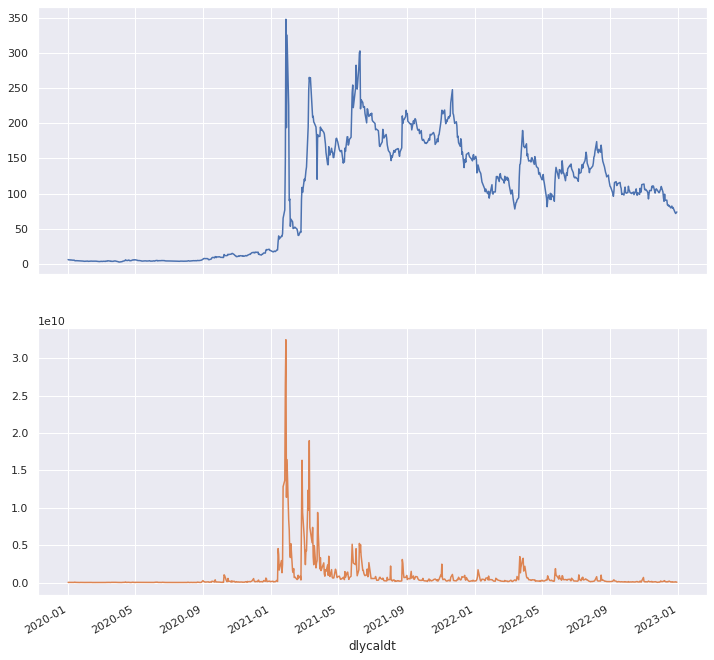

In [10]:
prices_after_20[['prc_adjusted_bw', 'dlyprcvol']].plot(subplots=True, legend=False, figsize=(12, 12));

In [18]:
import matplotlib.dates as mdates

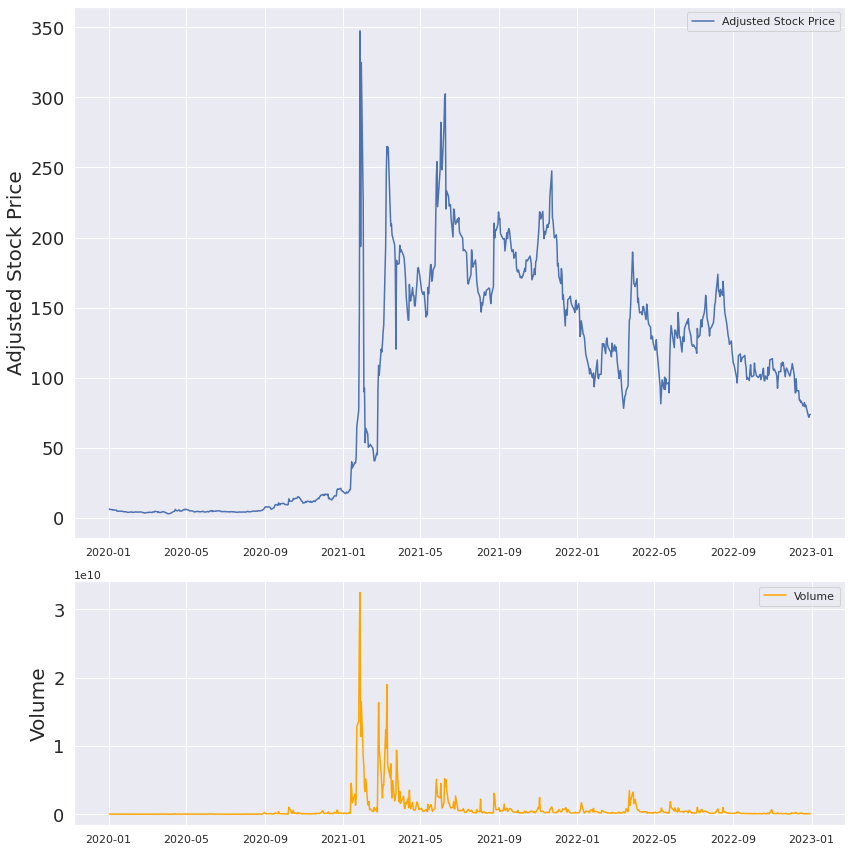

In [31]:
fig, axs = plt.subplots(3, 1, figsize=(12,12), sharex=True, sharey=False)                

# prices_after_20[['prc_adjusted_bw', 'dlyprcvol']]

axs[0] = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
axs[0].plot(prices_after_20.index, prices_after_20.prc_adjusted_bw, 'b', label='Adjusted Stock Price')
axs[0].set_ylabel("Adjusted Stock Price", fontsize=20)
axs[0].tick_params(axis='y', labelsize=18)    
axs[0].legend(loc=2)
# axs[0].set_ylim([0.5, 5]) 
axs[0].legend(loc=1)  

axs[1] = plt.subplot2grid((3, 1), (2, 0))
axs[1].plot(prices_after_20.index, prices_after_20.dlyprcvol, 'orange', label='Volume')
axs[1].set_ylabel("Volume", fontsize=20)
axs[1].tick_params(axis='y', labelsize=18)    
axs[1].legend(loc=1)
# axs[0].set_ylim([0.5, 5]) 

# axs[1].xaxis.set_major_locator(mdates.DayLocator(interval=180))
# axs[1].set_xlim([pd.to_datetime('2020-01-01'), pd.to_datetime('2023-01-01')])
# plt.setp(axs[1].get_xticklabels(), rotation=0, fontsize=18)
# fig.suptitle('Delta Coefficients: ' + tickername + ' ' + str(i) + ' ' + ids[i].strip(), fontsize=16, x = 0.5, y = 0.99)
fig.tight_layout()

In [66]:
db.close()

In [67]:
%reset -f